**Уровень 1:**  
Даны дома из Бостона  
Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv)  
Написать код разложения дома по указанному базису

In [228]:
import random
import numpy as np

def load_table(fname):
    table = []
    with open(fname) as f:
        f.readline()
        for line in f:
            row = [float(i) for i in line.strip().split(',')]
            del row[len(row) - 1]
            table.append(row)
    return table

def get_random_house(table):
    return table[round(random.random() * (len(table) - 1))]

def print_basis(b):
    print("[")
    for i, row in enumerate(b):
        st = "  [ "
        for item in row:
            st += f"{item} "
        if i != len(b) - 1:
            st += "],"
        else:
            st += "]"
        print(st)
    print("]")
    
def print_house(h):
    st = "[ "
    for item in h:
        st += f"{item} "
    st += "]"
    print(st)


houses = load_table("boston_data.csv")

while True:
    # генерируем набор векторов из предоставленных данных
    basis = []
    for i in range(len(houses[0])):
        basis.append(get_random_house(houses))
    basis = np.array(basis)
    
    # проверяем, является ли этот набор базисом
    det = np.linalg.det(basis)
    if det != 0:
        break

print("Базис:")
print_basis(basis)

house = np.array(get_random_house(houses))
print("\nДом:")
print_house(house)

result = np.linalg.inv(basis).dot(house)
print("\nРезультат разложения:")
print_house(result)

check = basis.dot(result)
print("\nПроверка:")
check = [round(x, 6) for x in check] # минимизируем погрешность (оставляем 6 знаков после запятой)
print_house(check)

Базис:
[
  [ 4.64689 0.0 18.1 0.0 0.614 6.98 67.6 2.5329 24.0 666.0 20.2 374.68 11.66 ],
  [ 0.16439 22.0 5.86 0.0 0.431 6.433 49.1 7.8265 7.0 330.0 19.1 374.71 9.52 ],
  [ 9.32909 0.0 18.1 0.0 0.713 6.185 98.7 2.2616 24.0 666.0 20.2 396.9 18.13 ],
  [ 3.1636 0.0 18.1 0.0 0.655 5.759 48.2 3.0665 24.0 666.0 20.2 334.4 14.13 ],
  [ 0.0686 0.0 2.89 0.0 0.445 7.416 62.5 3.4952 2.0 276.0 18.0 396.9 6.19 ],
  [ 0.11432 0.0 8.56 0.0 0.52 6.781 71.3 2.8561 5.0 384.0 20.9 395.58 7.67 ],
  [ 0.04301 80.0 1.91 0.0 0.413 5.663 21.9 10.5857 4.0 334.0 22.0 382.8 8.05 ],
  [ 0.05059 0.0 4.49 0.0 0.449 6.389 48.0 4.7794 3.0 247.0 18.5 396.9 9.62 ],
  [ 0.03705 20.0 3.33 0.0 0.4429 6.968 37.2 5.2447 5.0 216.0 14.9 392.23 4.59 ],
  [ 8.98296 0.0 18.1 1.0 0.77 6.212 97.4 2.1222 24.0 666.0 20.2 377.73 17.6 ],
  [ 0.06151 0.0 5.19 0.0 0.515 5.968 58.5 4.8122 5.0 224.0 20.2 396.9 9.29 ],
  [ 0.02498 0.0 1.89 0.0 0.518 6.54 59.7 6.2669 1.0 422.0 15.9 389.96 8.65 ],
  [ 0.26938 0.0 9.9 0.0 0.544 6.266 82.8 3.

**Уровень 0**  
Даны вектора x=(1,1), y=(2, 0) и z=(0,2)  
Надо:  
Изобразить вектора на экране  
Изобразить точку x + y + z  
Найти угол между векторами x и y

Угол между векторами x и y составляет 45 градусов


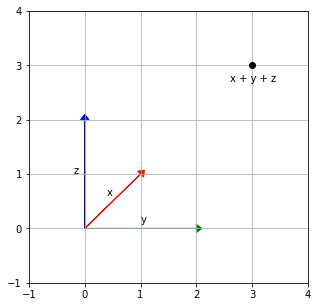

In [229]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 1])
y = np.array([2, 0])
z = np.array([0, 2])
p = x + y + z
sc_mul = x.dot(y)
mod_x = np.linalg.norm(x)
mod_y = np.linalg.norm(y)
cos = sc_mul / (mod_x * mod_y)
alpha = int(np.arccos(cos) * 180 / np.pi)
print(f"Угол между векторами x и y составляет {alpha} градусов")

fig = plt.figure(figsize=(5, 5))
ax = fig.gca()
ax.arrow(0, 0, x[0], x[1], head_width=0.15, head_length=0.1, color="r")
ax.arrow(0, 0, y[0], y[1], head_width=0.15, head_length=0.1, color="g")
ax.arrow(0, 0, z[0], z[1], head_width=0.15, head_length=0.1, color="b")
plt.plot(p[0], p[1], 'ok')

ax.annotate("x", x * 0.4 + [0, 0.2])
ax.annotate("y", y * 0.5 + [0, 0.1])
ax.annotate("z", z * 0.5 + [-0.2, 0])
ax.annotate("x + y + z", p + [-0.4, -0.3])

plt.xlim([-1, 4])
plt.ylim([-1, 4])
plt.grid(b=True, which='major') # plot grid lines
plt.show()